# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 9 submission</b></u>

### Roster Name: Andrew Vu
### Student ID: 015055911
### Email address: andrew.k.vu@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

- Autoencoders file

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [65]:
np.random.seed(42)

#### Code the solution

### Load and prepare image data

In [66]:
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape
# scale images to the [0,1] range


((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

### Autoencoder model and its performance for first 10 images in test set

In [67]:
# Reshape images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [68]:
input_layer = Input(shape=(784,)) # 28 * 28
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='sigmoid')(encoded)
decoded = layers.Dense(128, activation='sigmoid')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)
autoencoder.summary()

# encoder model
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(128,))
decoder_layer = autoencoder.layers[-1]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Model: "functional_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 784)             

In [69]:
# Fitting/training the model

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 1s 42ms/step - loss: 0.5879 - val_loss: 0.5141
Epoch 2/30
24/24 [==============================] - 1s 37ms/step - loss: 0.4989 - val_loss: 0.4915
Epoch 3/30
24/24 [==============================] - 1s 41ms/step - loss: 0.4867 - val_loss: 0.4828
Epoch 4/30
24/24 [==============================] - 1s 46ms/step - loss: 0.4747 - val_loss: 0.4646
Epoch 5/30
24/24 [==============================] - 1s 46ms/step - loss: 0.4506 - val_loss: 0.4371
Epoch 6/30
24/24 [==============================] - 1s 47ms/step - loss: 0.4261 - val_loss: 0.4161
Epoch 7/30
24/24 [==============================] - 1s 40ms/step - loss: 0.4075 - val_loss: 0.4020
Epoch 8/30
24/24 [==============================] - 1s 41ms/step - loss: 0.3966 - val_loss: 0.3937
Epoch 9/30
24/24 [==============================] - 1s 40ms/step - loss: 0.3895 - val_loss: 0.3892
Epoch 10/30
24/24 [==============================] - 1s 42ms/step - loss: 0.3859 - val_loss: 0.3850
Epoch 11/

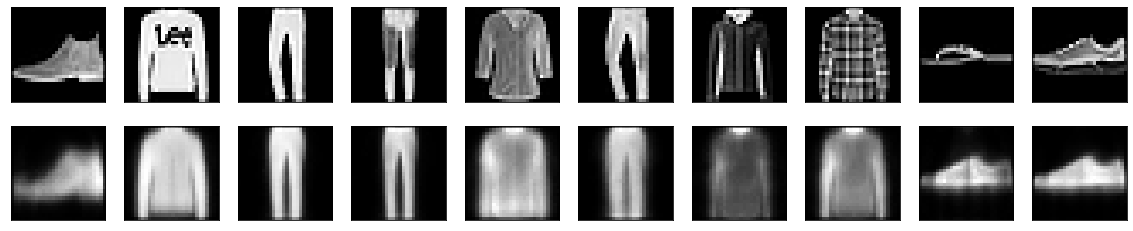

In [70]:
# Plotting the reconstructed images
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Reshape + denoise images with an autoencoder model + plotting

In [71]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [72]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

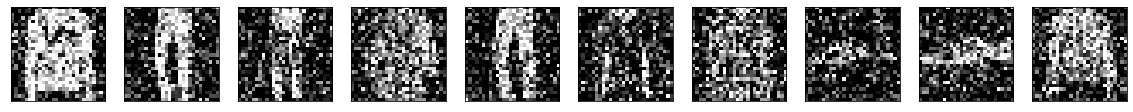

In [73]:
# Plotting the noised images
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [74]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.summary()

Model: "functional_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 14, 14, 32)      

### Training the noise model + plotting

In [75]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 34s 1s/step - loss: 0.5513 - val_loss: 0.3879
Epoch 2/30
24/24 [==============================] - 34s 1s/step - loss: 0.3605 - val_loss: 0.3408
Epoch 3/30
24/24 [==============================] - 34s 1s/step - loss: 0.3311 - val_loss: 0.3226
Epoch 4/30
24/24 [==============================] - 34s 1s/step - loss: 0.3192 - val_loss: 0.3152
Epoch 5/30
24/24 [==============================] - 35s 1s/step - loss: 0.3132 - val_loss: 0.3108
Epoch 6/30
24/24 [==============================] - 34s 1s/step - loss: 0.3097 - val_loss: 0.3079
Epoch 7/30
24/24 [==============================] - 34s 1s/step - loss: 0.3071 - val_loss: 0.3059
Epoch 8/30
24/24 [==============================] - 34s 1s/step - loss: 0.3055 - val_loss: 0.3052
Epoch 9/30
24/24 [==============================] - 34s 1s/step - loss: 0.3038 - val_loss: 0.3029
Epoch 10/30
24/24 [==============================] - 34s 1s/step - loss: 0.3025 - val_loss: 0.3018
Epoch 11/30
24/24 [

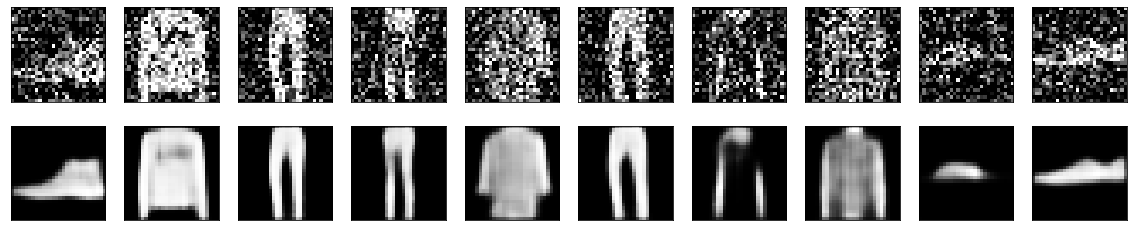

In [76]:
# Plotting the reconstructed images
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction denoised
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()